In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


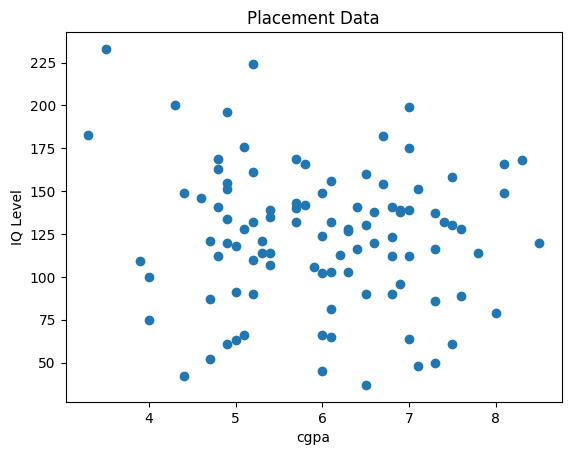

In [9]:
plt.title("Placement Data")
plt.xlabel("cgpa")
plt.ylabel("IQ Level")
plt.scatter(x=df['cgpa'],y=df['iq'])
plt.show()

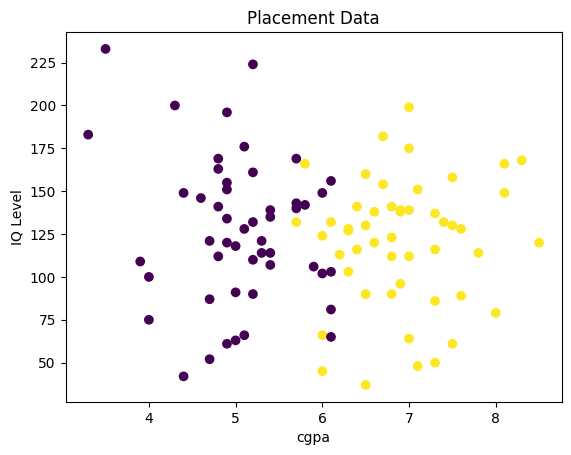

In [10]:
plt.title("Placement Data")
plt.xlabel("cgpa")
plt.ylabel("IQ Level")
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])
plt.savefig("placement scatter plot")
plt.show()

In [11]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [12]:
df.placement.value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [13]:
X = df.drop(columns=['placement'])
y = df ['placement']

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [20]:
X_train

,cgpa,iq
72,7.3,116.0
66,6.9,96.0
69,8.5,120.0
67,5.0,118.0
26,7.0,199.0
...,...,...
56,6.1,65.0
37,8.1,149.0
7,5.0,63.0
91,7.5,158.0


In [23]:
X_test

,cgpa,iq
79,6.5,90.0
75,4.8,169.0
63,6.3,128.0
15,5.1,176.0
38,6.5,160.0
11,6.9,138.0
40,4.9,134.0
45,6.0,66.0
39,4.6,146.0
62,6.0,102.0


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model

LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})

,y_test,y_predict
79,1,1
75,0,0
63,1,1
15,0,0
38,1,1
11,1,1
40,0,0
45,1,0
39,0,0
62,0,0


In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [49]:
print("Accuracy Score :" , accuracy_score(y_test,y_pred))

Accuracy Score : 0.9


In [50]:
print("Confusion Matrix : \n" , confusion_matrix(y_test,y_pred))

Confusion Matrix : 
 [[12  1]
 [ 1  6]]


In [51]:
print("classification_report  : \n" , classification_report(y_test,y_pred))

classification_report  : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20

